<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ingeniería de feature

Programa creado para mostrar ejemplos prácticos de los visto durante la clase<br>
v1.1

In [30]:
import os
import platform

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [31]:
if os.access('AAPL.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/stock/AAPL.csv > AAPL.csv
    else:
        !wget AAPL.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/stock/AAPL.csv

if os.access('MSFT.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/stock/MSFT.csv > MSFT.csv
    else:
        !wget MSFT.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/stock/MSFT.csv

--2021-10-19 15:11:40--  http://aapl.csv/
Resolving aapl.csv (aapl.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘aapl.csv’
--2021-10-19 15:11:40--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/stock/AAPL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9911 (9.7K) [text/plain]
Saving to: ‘AAPL.csv’

AAPL.csv            100%[===================>]   9.68K  --.-KB/s    in 0s      

2021-10-19 15:11:40 (84.7 MB/s) - ‘AAPL.csv’ saved [9911/9911]

FINISHED --2021-10-19 15:11:40--
Total wall clock time: 0.2s
Downloaded: 1 files, 9.7K in 0s (84.7 MB/s)
--2021-10-19 15:11:41--  http://msft.csv/
Resolving msft.csv (msft.csv)... failed: Name or service not known.
wget: unable to resolve host addres

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [32]:
# Valores de las acciones de APPLE y Microsoft de los últimos 6 meses (2020-2021)

apple = np.asanyarray([float(value.replace(',', '.')) for value in reversed(pd.read_csv("AAPL.csv")['Último'].values)])
microsoft = np.asanyarray([float(value.replace(',', '.')) for value in reversed(pd.read_csv("MSFT.csv")['Último'].values)])

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

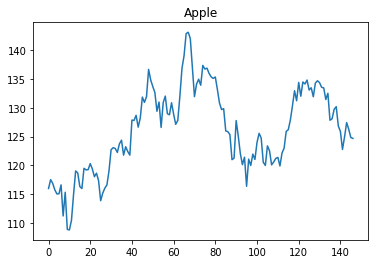

In [33]:
plt.plot(apple)
plt.title("Apple")
plt.show()

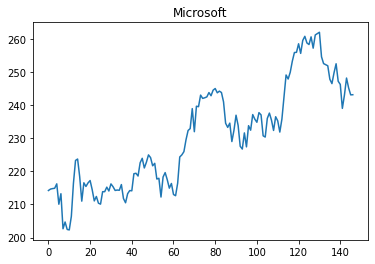

In [34]:
plt.plot(microsoft)
plt.title("Microsoft")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


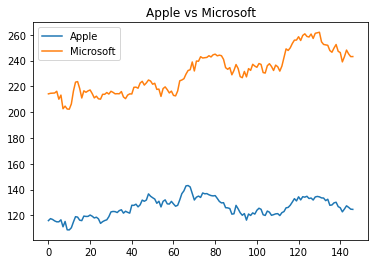

In [35]:
fig = plt.figure()
plt.title("Apple vs Microsoft")
ax = fig.add_subplot()
ax.plot(apple, label="Apple")
ax.plot(microsoft, label="Microsoft")
ax.legend()
plt.show()

¿Uno podría pensar que la acción a comprar debería ser la de Microsoft, cierto?\
Veremos a continuación en análisis de los datos de cada una.

### Obtener la media y el desvio de cada set de datos

In [36]:
def size_mean_std(data):
    size = len(data)
    
    mean = np.mean(data)
    std = np.std(data)
    
    return size, mean, std

In [37]:
n1, x1, std1 = size_mean_std(apple)
print("Apple")
print(f"size: {n1}, mean: {x1}, std: {std1}")

Apple
size: 147, mean: 126.08959183673468, std: 7.2881269467007685


In [38]:
n2, x2, std2 = size_mean_std(microsoft)
print("Microsoft")
print(f"size: {n2}, mean: {x2}, std: {std2}")

Microsoft
size: 147, mean: 230.67843537414967, std: 15.698336611943251


### Normalizar los datos con Standar Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler_apple = StandardScaler()
scaler_microsoft = StandardScaler()
apple_norm = scaler_apple.fit_transform(apple.reshape(-1, 1))
microsoft_norm = scaler_microsoft.fit_transform(microsoft.reshape(-1, 1))

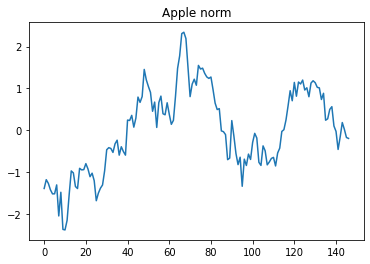

In [40]:
plt.plot(apple_norm)
plt.title("Apple norm")
plt.show()

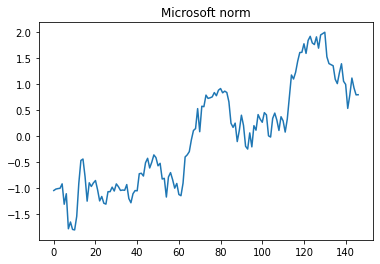

In [41]:
plt.plot(microsoft_norm)
plt.title("Microsoft norm")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


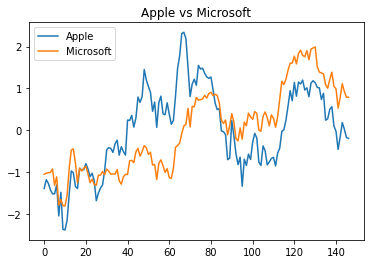

In [42]:
fig = plt.figure()
plt.title("Apple vs Microsoft")
ax = fig.add_subplot()
ax.plot(apple_norm, label="Apple")
ax.plot(microsoft_norm, label="Microsoft")
ax.legend()
plt.show()

Ahora, ¿cuál acción elegirian? Complicado definirlo a simple vista, ¿cierto?

### ¿Qué acción presentó una mejor evolución?

In [43]:
n3, x3, std3 = size_mean_std(apple_norm)
print("Apple")
print(f"size: {n3}, mean: {x3}, std: {std3}")

Apple
size: 147, mean: 1.3534147347811431e-15, std: 1.0


In [44]:
n4, x4, std4 = size_mean_std(microsoft_norm)
print("Microsoft")
print(f"size: {n4}, mean: {x4}, std: {std4}")

Microsoft
size: 147, mean: -7.250436079184696e-16, std: 1.0


In [45]:
print("¿Qué acción debería haber comprado al comienzo del período?:")
print("Apple" if x3 >= x4 else "Microsoft")

¿Qué acción debería haber comprado al comienzo del período?:
Apple
